In [85]:
from langgraph.graph import StateGraph , START, END
from typing import TypedDict
from dotenv import load_dotenv
from langchain_groq import ChatGroq
import os


In [86]:
load_dotenv()

model = ChatGroq(model_name = 'openai/gpt-oss-20b', api_key = os.getenv("GROQ_API_KEY"))

In [87]:
class BlogState(TypedDict):
    title   : str 
    outline : str
    content : str
    evaluation_score : float

In [88]:
def create_outline(state : BlogState) -> BlogState:
    # fetch title 
    title = state['title']

    # call llm gen outline
    prompt = f'Generate a detailed outline for a blog on the topic - {title}'
    outline = model.invoke(prompt).content
    # update state
    state['outline'] = outline
    return state

In [89]:
def create_blog(state : BlogState) -> BlogState:
    title = state['title']
    outline = state['outline']

    prompt = f'Write a detailed blog on the title - {title} using the follwing outline \n {outline}'

    content = model.invoke(prompt).content

    # update the 
    state['content'] = content


In [90]:
def evaluation_score(state: BlogState) -> BlogState:
    # Extract from state
    content = state['content']
    outline = state['outline']

    # Prompt for evaluation
    prompt = f"Based on the outline:\n{outline}\nRate my blog:\n{content}\nGive a score between 0 and 5."
    
    # Call LLM
    response = model.invoke(prompt)
    evaluation_score = response.content  # or response['content'] depending on your model's output format

    # Update state
    state['content'] = content
    return state


In [91]:
graph = StateGraph(BlogState)

# grapg
graph.add_node('create_outline', create_outline)
graph.add_node('create_blog', create_blog)
graph.add_node('evaluate_blog', evaluation_score)

# graph add edges 
graph.add_edge(START, 'create_outline')
graph.add_edge('create_outline', 'create_blog')
graph.add_edge('create_blog', 'evaluate_blog')
graph.add_edge('evaluate_blog', END)

# compile the graph
workflow = graph.compile()


In [76]:
from typing import TypedDict
from langgraph.graph import StateGraph, START, END

class BlogState(TypedDict):
    title: str
    outline: str
    content: str
    evaluation_score: float

def create_outline(state: BlogState) -> BlogState:
    title = state['title']
    prompt = f'Generate a detailed outline for a blog on the topic - {title}'
    outline = model.invoke(prompt).content
    state['outline'] = outline
    return state

def create_blog(state: BlogState) -> BlogState:
    title = state['title']
    outline = state['outline']
    prompt = f'Write a detailed blog on the title - {title} using the following outline:\n{outline}'
    content = model.invoke(prompt).content
    state['content'] = content
    return state

def evaluation_score(state: BlogState) -> BlogState:
    content = state['content']
    outline = state['outline']
    prompt = f"Based on the outline:\n{outline}\nRate my blog:\n{content}\nGive a score between 0 and 5."
    response = model.invoke(prompt)
    score = response.content
    state['evaluation_score'] = score
    return state

graph = StateGraph(BlogState)

graph.add_node('create_outline', create_outline)
graph.add_node('create_blog', create_blog)
graph.add_node('evaluate_blog', evaluation_score)

graph.add_edge(START, 'create_outline')
graph.add_edge('create_outline', 'create_blog')
graph.add_edge('create_blog', 'evaluate_blog')
graph.add_edge('evaluate_blog', END)

workflow = graph.compile()


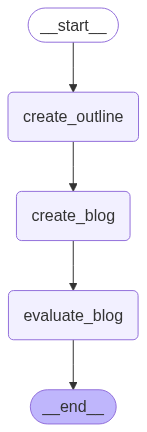

In [96]:
from IPython.display import Image

png_bytes = workflow.get_graph().draw_mermaid_png()
Image(png_bytes)

In [77]:
ser_input = input('Enter a topic to generate blog: ')
initial_state = {
    'title': user_input,
    'outline': '',
    'content': '',
    'evaluation_score': 0.0
}

final_state = workflow.invoke(initial_state)
print("Outline:\n", final_state['outline'])
print("\nBlog Content:\n", final_state['content'])
print("\nEvaluation Score:", final_state['evaluation_score'])

Enter a topic to generate blog:  Rise of AI in India


Outline:
 ## Blog Outline  
**Title:** *Rise of AI in India: From Startup Sparks to National Strategy*  

---

### 1. Introduction  
- **Hook:** A striking statistic or anecdote (e.g., “India’s AI market is projected to hit $12 bn by 2027”).  
- **Why It Matters:** Briefly explain AI’s transformative potential across sectors.  
- **Purpose of the Blog:** Outline what readers will learn (history, ecosystem, policy, opportunities, challenges).  
- **Road‑map Preview:** Quick bullet‑list of main sections.

---

### 2. Historical Trajectory of AI in India  
| Phase | Time Period | Key Milestones | Impact |
|------|------------|---------------|-------|
| Early Foundations | 1960s‑1980s | – First AI research labs (e.g., IIT Bombay).<br>– Government-funded AI projects (e.g., Indian Statistical Institute). | Limited to academia. |
| Institutional Growth | 1990s‑2000s | – IITs & IISc launch AI courses.<br>– Rise of research centers (e.g., NITs, AI labs). | Built foundational talent. |
| Startup

START --> prompt1 (Generate a detailed information about the topic) --> model --> Generate a content --> promot --> Generate a summary of the content --> model --> summary contnt

In [6]:
from langgraph.graph import StateGraph , START, END
from typing import TypedDict
from dotenv import load_dotenv
from langchain_groq import ChatGroq
import os

load_dotenv()

model = ChatGroq(model_name = 'openai/gpt-oss-20b', api_key = os.getenv("GROQ_API_KEY"))


In [22]:
class ArticleState(TypedDict, total=False):
    title: str
    content: str
    text_summary: str

def article(state: ArticleState) -> ArticleState:
    title = state['title']
    prompt = f'Generate a detailed article on the topic {title}'
    content = model.invoke(prompt).content
    state['content'] = content
    return state

def summary(state: ArticleState) -> ArticleState:
    content = state.get('content', '')
    prompt = f'Generate a 10 point summary of the following content - {content}'
    summary_text = model.invoke(prompt).content
    state['summary_text'] = summary_text
    return state

graph = StateGraph(ArticleState)
graph.add_node('article', article)
graph.add_node('summary', summary)
graph.add_edge(START, 'article')
graph.add_edge('article', 'summary')
graph.add_edge('summary', END)

workflow = graph.compile()
initial_state = {'title': 'What is the quantum computer'}
response = workflow.invoke(initial_state)
print(response['content'])


# What Is a Quantum Computer?

*Quantum computers* are the next frontier in computation, promising to solve certain problems exponentially faster than classical computers.  While the term “quantum” may conjure images of exotic physics, the underlying idea is surprisingly simple: instead of processing bits that are either 0 or 1, a quantum computer manipulates *qubits* that can exist in many states simultaneously.  This ability, combined with quantum‑mechanical phenomena such as superposition and entanglement, gives quantum machines the power to tackle problems that are currently intractable.

Below we provide a detailed, step‑by‑step exploration of quantum computers: their fundamental principles, key components, algorithms, hardware platforms, challenges, and real‑world applications.

---

## 1. Classical vs. Quantum Computing

| Aspect | Classical Computer | Quantum Computer |
|-------|------------------|-----------------|
| **Basic unit** | Bit (0 or 1) | Qubit (can be 0, 1, or any s